In [2]:
import pandas as pd
import numpy as np

In [3]:
#reading the dataset
f_news=pd.read_csv('train_news.csv')

In [4]:
f_news.head()

Unnamed: 0     id                                           headline  \
0           0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1           1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2           2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3           3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4           4   7596                       A Digital 9/11 If Trump Wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  label  
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2  Sunday on ABC’s “This Week,” while discussing ...      0  
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4    Finian Cunningham has written extensively on...      1

In [5]:
#cheking the shape of dataset
f_news.shape

(20800, 6)

In [6]:
#cheking for null values
f_news.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [7]:
#dropping all the null values as applying feature engeering here will not work as it is a text data
f_news=f_news.dropna()

In [8]:
#getting the information about D_types of a data_set
f_news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18285 non-null  int64 
 1   id          18285 non-null  int64 
 2   headline    18285 non-null  object
 3   written_by  18285 non-null  object
 4   news        18285 non-null  object
 5   label       18285 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1000.0+ KB


#### after dropping null values we are left with good volume of data it will not harm our goal.

In [9]:
#dropping id and Unnamed column
f_news.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [10]:
## Getting the dependent Features
y=f_news['label']

In [11]:
## Getting the Independent Features
x=f_news.drop(['label'],axis=1)

In [12]:
#cheking x
x.head()

headline  \
0  Ethics Questions Dogged Agriculture Nominee as...   
1  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2  Cotton to House: ’Do Not Walk the Plank and Vo...   
3  Paul LePage, Besieged Maine Governor, Sends Co...   
4                       A Digital 9/11 If Trump Wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...  
1  HOUSTON  —   Venezuela had a plan. It was a ta...  
2  Sunday on ABC’s “This Week,” while discussing ...  
3  AUGUSTA, Me.  —   The beleaguered Republican g...  
4    Finian Cunningham has written extensively on...

In [13]:
#creating a copy of the dataset
reports=f_news.copy()

In [14]:
#resetting the index value as it will helpfull in data preprocessing
reports.reset_index(inplace=True)

In [15]:
reports.head()

index                                           headline  \
0      0  Ethics Questions Dogged Agriculture Nominee as...   
1      1  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2      2  Cotton to House: ’Do Not Walk the Plank and Vo...   
3      3  Paul LePage, Besieged Maine Governor, Sends Co...   
4      4                       A Digital 9/11 If Trump Wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  label  
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2  Sunday on ABC’s “This Week,” while discussing ...      0  
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4    Finian Cunningham has written extensively on...      1

#### DATA PREPROCESSING

In [17]:
#IMPORTING NLTK LIBRARY TO PERFORM WORD PREPROCESSING
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

ps=PorterStemmer() #CREATING INSTANCE OF A PORTERSTEMMER CLASS
corpus= [] #INITIALIZING LIST TO STORE THE WORDS AFTER PREPROCESSING

#applying loop 
for i in range(0, len(reports)):
    review= re.sub('[^a-zA_Z]',' ',reports['headline'][i]) #removing all the characters except Alphabets from a-z, A_Z
    review=review.lower() # converting all the charracters to lowercase
    review=review.split()
    
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]#applying stemming only if the word is not present in stopwords
    review=' '.join(review) #joining all the words
    corpus.append(review) #storing the words in the corpus list

In [19]:
print(reports['headline'][5])
print("\n")
print(corpus[5])
# here we can see after applying stemming the headline at 5 position has been changed to minimal 

Rapid Evolution Saved This Fish From Pollution, Study Says - The New York Times


apid volut ave ish rom ollut tudi ay ew ork ime


In [20]:
## Applying Countvectorizer
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
x = cv.fit_transform(corpus).toarray()

In [21]:
x.shape

(18285, 5000)

In [22]:
y=reports['label']

In [23]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [24]:
cv.get_feature_names()[:10]

['aa',
 'ab',
 'abandon',
 'abbi',
 'abduct',
 'abe',
 'abedin',
 'abel',
 'abi',
 'abinet']

In [25]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [26]:
count_df = pd.DataFrame(x_train, columns=cv.get_feature_names())

In [27]:
count_df.head()

aa  ab  abandon  abbi  abduct  abe  abedin  abel  abi  abinet  ...  \
0   0   0        0     0       0    0       0     0    0       0  ...   
1   0   0        0     0       0    0       0     0    0       0  ...   
2   0   0        0     0       0    0       0     0    0       0  ...   
3   0   0        0     0       0    0       0     0    0       0  ...   
4   0   0        0     0       0    0       0     0    0       0  ...   

   zealand  zero  zika  zika iru  zionist  zone  zone ew  zone ew ork  zu  \
0        0     0     0         0        0     0        0            0   0   
1        0     0     0         0        0     0        0            0   0   
2        0     0     0         0        0     0        0            0   0   
3        0     0     0         0        0     0        0            0   0   
4        0     0     0         0        0     0        0            0   0   

   zuckerberg  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 5000 columns]

In [28]:
import matplotlib.pyplot as plt

In [39]:
#function to plot Confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import itertools
classifier=MultinomialNB()

###### using hyperparametrize tunnig to fing the best alpha value 

In [44]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(x_train,y_train)
    y_pred=sub_classifier.predict(x_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score : 0.8782104391052196
Alpha: 0.1, Score : 0.8949461474730738
Alpha: 0.2, Score : 0.8966031483015742
Alpha: 0.30000000000000004, Score : 0.8972659486329743
Alpha: 0.4, Score : 0.8971002485501243
Alpha: 0.5, Score : 0.8971002485501243
Alpha: 0.6000000000000001, Score : 0.8966031483015742
Alpha: 0.7000000000000001, Score : 0.8954432477216239
Alpha: 0.8, Score : 0.8961060480530241
Alpha: 0.9, Score : 0.895940347970174


In [45]:
classifier=MultinomialNB(alpha=0.3)

accuracy:   0.897
Confusion matrix, without normalization


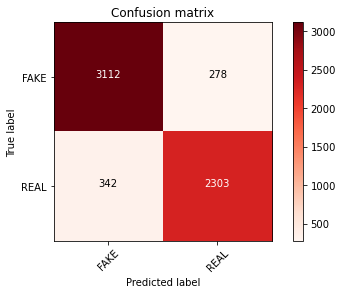

In [46]:
classifier.fit(x_train, y_train)
pred = classifier.predict(x_test)
score =metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [47]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

accuracy:   0.918
Confusion matrix, without normalization


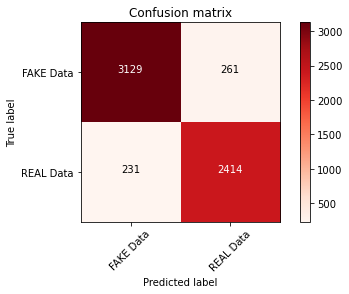

In [48]:
linear_clf.fit(x_train, y_train)
pred = linear_clf.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

accuracy:   0.927
Confusion matrix, without normalization


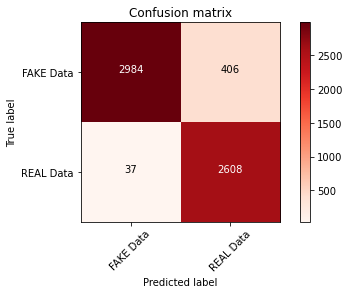

In [49]:
from sklearn.svm import SVC 
svc=SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

accuracy:   0.907
Confusion matrix, without normalization


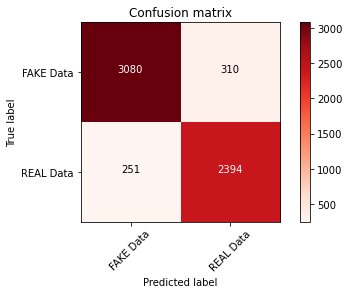

In [50]:
from sklearn.tree import DecisionTreeClassifier 
dtc= DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred = dtc.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])



accuracy:   0.808
Confusion matrix, without normalization


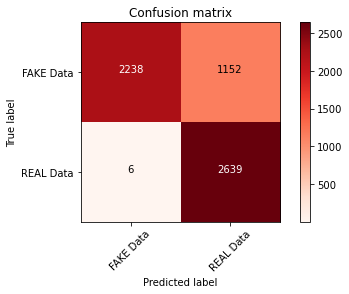

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])


In [54]:
outcome=pd.DataFrame({'Model':['MultinomialNB','PassiveAggressiveClassifier','DecisionTreeClassifier','SVC','KNeighborsClassifier'],'Accuracy_Score':[0.897,0.918,0.907,0.927,0.808]})
outcome

Model  Accuracy_Score
0                MultinomialNB           0.897
1  PassiveAggressiveClassifier           0.918
2       DecisionTreeClassifier           0.907
3                          SVC           0.927
4         KNeighborsClassifier           0.808

## here we see that SVC is giving higher accuracy score therefore saving it 

In [55]:
import joblib
joblib.dump(svc,"svc.Fake_news.pkl")

['svc.Fake_news.pkl']